In [2]:
import pandas as pd

# Import all the required libraries and functions
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay \
, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, export_graphviz
# import graphviz
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

In [3]:
#Since there are 138 features, increase the max columns to be displayed to 150
pd.set_option('display.max_columns', 150)

In [4]:
#load opt out data
optout_df = pd.read_csv('data/Keap Opt Out List Aug 2024.csv')

#check the top 2 rows of data
optout_df.head(2)

,Id,Name,First Name,Last Name,Spouse Name,Birthday,Company Name,Company Id,Phone 1,Phone 1.1,Phone 1 Ext,Phone 1 Type,Phone 2,Phone 2.1,Phone 2 Ext,Phone 2 Type,Phone 3,Phone 3.1,Phone 3 Ext,Phone 3 Type,Email,Email Address 2,Email Address 3,Fax 1,Fax 1.1,Fax 1 Type,Fax 2,Fax 2.1,Fax 2 Type,Street Address 1,Street Address 2,City,State,Postal Code,Postal Code.1,Zip Four,Country,Street Address 1 (Shipping),Street Address 2 (Shipping),City (Shipping),State (Shipping),Postal Code (Shipping),Postal Code (Shipping).1,Zip Four (Shipping),Country (Shipping),Twitter,Facebook,LinkedIn,Instagram,YouTube,Snapchat,Pinterest,Street Address 1 (Optional),Street Address 2 (Optional),City (Optional),State (Optional),Postal Code (Optional),Postal Code (Optional).1,Zip Four (Optional),Country (Optional),Phone 4,Phone 4.1,Phone 4 Ext,Phone 4 Type,Phone 5,Phone 5.1,Phone 5 Ext,Phone 5 Type,Tag Ids,Tags,Tag Category Ids,Tag Categories,Person Type,Job Title,Website,SSN,Last 4 SSN,Middle Name,Nickname,User Name,Password,Assistant Name,Assistant Phone,Title,Suffix,Anniversary,Created By,Date Created,Last Updated,OwnerID,Notes,Language,Time Zone,Owner,Lead Source,Lead Source Category,Referral Code,Email Status,Topical Interests,D_D Why Interested,Personal Information Request,DHP PersonID,Dawn Horse Press Updates,DHP Survey: Age Group,Monthly Conversations,Global Follow Up Events,India Satsang,Email Consent,Level of Association,Event,Comments/Notes,Mission Updates,Guru Purnima Updates,Preferred Language,Global Newsletter Opt-In Status,European Newsletter Opt-In Status,2021 Guru Purnima,Screening,Country.1,Conscious Light Updates Opt In,Date of Last Screening Attendance,Date of Last Screening Registration,GaSource,GaMedium,GaCampaign,GaContent,GaTerm,GaReferurl,IPAddress,UtmSource,UtmMedium,UtmCampaign,UtmContent,UtmTerm,UtmReferurl,UtmIPAddress,UtmAdidamId,Lead Score
0,749,Joseph Massey,Joseph,Massey,NaN,NaN,NaN,0,(413) 387-5503 (Work),4133875503,NaN,Work,NaN,NaN,NaN,Work,NaN,NaN,NaN,NaN,tongbliss@gmail.com,NaN,NaN,NaN,NaN,Work,NaN,NaN,NaN,34 Pleasant St.,Apt O,Easthampton,MA,1027,1027,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2208, 2212, 2180, 2168, 2166, 2164, 2101, 1735...","temp -> Orderer, Mission -> 2024 NorthEast Ret...","2208, 2212, 2180, 2168, 2166, 2164, 2101, 1735...","Prospect, No Category, temp, Leads, Movie, Eve...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,System,1/29/2018 16:46,6/26/2024 11:44,0,nullGreen Gorilla|The Nine Great Laws of Radi...,en-US,America/New_York,NaN,D&D Webinar 2014,Email Upload,NaN,Opt-Out,Select...,Select...,NaN,NaN,NaN,25-40,Select...,Select...,Select...,NaN,Select..,Webinar - Sun. April 19,United States,NaN,NaN,Select...,NaN,NaN,NaN,Select...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,871,Mary e Pendergrast,Mary e,Pendergrast,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mependergrast@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GA,NaN,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2234, 2232, 2230, 888, 578, 576, 292, 238, 228...","Imported -> Klean13_Verified, Updated -> 6/27/...","2234, 2232, 2230, 888, 578, 576, 292, 238, 228...","Updated, temp, Mission, Customer, Imported",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dorothy Hall,1/29/2018 16:46,6/27/2024 1:23,2013,NaN,NaN,NaN,The Dawn Horse Press,D&D Webinar 2014,Email Upload,NaN,List Unsubscribe,Select...,Select...,NaN,17889.0,NaN,25-40,Select...,Select...,Select...,NaN,Select..,NaN,NaN,NaN,NaN,Select...,NaN,NaN,NaN,Select...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [27]:
#adding Opted_out column to the optout_df
optout_df['Opted Out'] = '1'

In [29]:
#check the top 2 rows of data
optout_df.head(2)

,Id,Name,First Name,Last Name,Spouse Name,Birthday,Company Name,Company Id,Phone 1,Phone 1.1,Phone 1 Ext,Phone 1 Type,Phone 2,Phone 2.1,Phone 2 Ext,Phone 2 Type,Phone 3,Phone 3.1,Phone 3 Ext,Phone 3 Type,Email,Email Address 2,Email Address 3,Fax 1,Fax 1.1,Fax 1 Type,Fax 2,Fax 2.1,Fax 2 Type,Street Address 1,Street Address 2,City,State,Postal Code,Postal Code.1,Zip Four,Country,Street Address 1 (Shipping),Street Address 2 (Shipping),City (Shipping),State (Shipping),Postal Code (Shipping),Postal Code (Shipping).1,Zip Four (Shipping),Country (Shipping),Twitter,Facebook,LinkedIn,Instagram,YouTube,Snapchat,Pinterest,Street Address 1 (Optional),Street Address 2 (Optional),City (Optional),State (Optional),Postal Code (Optional),Postal Code (Optional).1,Zip Four (Optional),Country (Optional),Phone 4,Phone 4.1,Phone 4 Ext,Phone 4 Type,Phone 5,Phone 5.1,Phone 5 Ext,Phone 5 Type,Tag Ids,Tags,Tag Category Ids,Tag Categories,Person Type,Job Title,Website,SSN,Last 4 SSN,Middle Name,Nickname,User Name,Password,Assistant Name,Assistant Phone,Title,Suffix,Anniversary,Created By,Date Created,Last Updated,OwnerID,Notes,Language,Time Zone,Owner,Lead Source,Lead Source Category,Referral Code,Email Status,Topical Interests,D_D Why Interested,Personal Information Request,DHP PersonID,Dawn Horse Press Updates,DHP Survey: Age Group,Monthly Conversations,Global Follow Up Events,India Satsang,Email Consent,Level of Association,Event,Comments/Notes,Mission Updates,Guru Purnima Updates,Preferred Language,Global Newsletter Opt-In Status,European Newsletter Opt-In Status,2021 Guru Purnima,Screening,Country.1,Conscious Light Updates Opt In,Date of Last Screening Attendance,Date of Last Screening Registration,GaSource,GaMedium,GaCampaign,GaContent,GaTerm,GaReferurl,IPAddress,UtmSource,UtmMedium,UtmCampaign,UtmContent,UtmTerm,UtmReferurl,UtmIPAddress,UtmAdidamId,Lead Score,Opted Out
0,749,Joseph Massey,Joseph,Massey,NaN,NaN,NaN,0,(413) 387-5503 (Work),4133875503,NaN,Work,NaN,NaN,NaN,Work,NaN,NaN,NaN,NaN,tongbliss@gmail.com,NaN,NaN,NaN,NaN,Work,NaN,NaN,NaN,34 Pleasant St.,Apt O,Easthampton,MA,1027,1027,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2208, 2212, 2180, 2168, 2166, 2164, 2101, 1735...","temp -> Orderer, Mission -> 2024 NorthEast Ret...","2208, 2212, 2180, 2168, 2166, 2164, 2101, 1735...","Prospect, No Category, temp, Leads, Movie, Eve...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,System,1/29/2018 16:46,6/26/2024 11:44,0,nullGreen Gorilla|The Nine Great Laws of Radi...,en-US,America/New_York,NaN,D&D Webinar 2014,Email Upload,NaN,Opt-Out,Select...,Select...,NaN,NaN,NaN,25-40,Select...,Select...,Select...,NaN,Select..,Webinar - Sun. April 19,United States,NaN,NaN,Select...,NaN,NaN,NaN,Select...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,1
1,871,Mary e Pendergrast,Mary e,Pendergrast,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mependergrast@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GA,NaN,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2234, 2232, 2230, 888, 578, 576, 292, 238, 228...","Imported -> Klean13_Verified, Updated -> 6/27/...","2234, 2232, 2230, 888, 578, 576, 292, 238, 228...","Updated, temp, Mission, Customer, Imported",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dorothy Hall,1/29/2018 16:46,6/27/2024 1:23,2013,NaN,NaN,NaN,The Dawn Horse Press,D&D Webinar 2014,Email Upload,NaN,List Unsubscribe,Select...,Select...,NaN,17889.0,NaN,25-40,Select...,Select...,Select...,NaN,Select..,NaN,NaN,NaN,NaN,Select...,NaN,NaN,NaN,Select...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1


In [31]:
#confirm optout_df shape after adding the "Opted Out" columns
optout_df.shape

(1642, 139)

In [33]:
#Check if any of the email column value is null as that is the index and will be used to merge data
optout_df['Email'].isna().sum()

0

In [35]:
#load all contacts information to merge with the Output df
all_cntcs_df = pd.read_csv('data/Mission All Contacts 8-15-24.csv')
all_cntcs_df.shape  #(26364, 138)

C:\Users\subra\AppData\Local\Temp\ipykernel_47632\1465393646.py:2: DtypeWarning: Columns (6,9,40,44,78,93,107,109,110,120,129,130,131,134,135) have mixed types. Specify dtype option on import or set low_memory=False.
  all_cntcs_df = pd.read_csv('data/Mission All Contacts 8-15-24.csv')


(26364, 138)

In [39]:
#Merge all contacts with the Opt out list and store it in all_optout_df based on the email
all_optout_df = pd.merge (all_cntcs_df, optout_df[['Opted Out', 'Email']], on='Email', how='left')

In [41]:
#Check the values in the Opted out column
all_optout_df['Opted Out'].value_counts()  #1642 rows

Opted Out
1    1642
Name: count, dtype: int64

In [43]:
all_optout_df.shape  #(26364, 139)

(26364, 139)

In [45]:
#check for duplicates and drop them
all_optout_df[['Email']].duplicated().sum()

92

In [47]:
#List all the records with duplicated Id, Name, Email combination
all_optout_df[all_optout_df[['Email']].duplicated()][["Id", "Name", "Email"]].sort_values(by="Name").head(100)
# all_optout_df[all_optout_df[['Email']].duplicated()][["Email"]].value_counts(dropna=False)  #90 Nans and 2 dupes

,Id,Name,Email
7097,34068,ALISON HARROP,NaN
7003,33814,Aaron Joy,NaN
7048,33934,Alex Miller,NaN
7024,33876,Amanda Sebasio-Ong,NaN
7065,33978,Amber Lupton,NaN
...,...,...,...
7089,34046,jose piedrahita,NaN
7053,33946,kym colwell,NaN
7014,33842,mary hakemian,NaN
6999,33802,michela torge-barcus,NaN


In [49]:
all_optout_df[['Email']].isna().sum()  #91 rows

Email    91
dtype: int64

In [51]:
#get the Non-Numeric / Categorical columns in a df:
cols = all_optout_df.columns
num_cols = all_optout_df._get_numeric_data().columns
num_cols
catg_cols = list(set(cols) - set(num_cols))
print (catg_cols)

['Opted Out', 'Email Consent', 'Tag Ids', 'City', 'GaMedium', 'India Satsang', 'Global Follow Up Events', 'Postal Code (Optional)', 'State', 'Tags', 'Person Type', 'Phone 4 Type', 'UtmSource', 'Level of Association', 'Fax 1 Type', 'Postal Code', 'UtmIPAddress', 'UtmMedium', 'D_D Why Interested', 'Conscious Light Updates Opt In', 'Preferred Language', 'Street Address 2', 'GaTerm', 'Date of Last Screening Registration', 'Notes', 'Phone 5 Type', 'Tag Category Ids', 'Country (Optional)', 'Postal Code (Optional).1', 'Created By', 'Date Created', 'Last Name', 'Postal Code.1', 'State (Shipping)', 'Nickname', 'Dawn Horse Press Updates', 'Name', 'Company Name', 'Global Newsletter Opt-In Status', 'Email', 'GaCampaign', 'Topical Interests', 'Country', 'Screening', 'Phone 1 Type', 'DHP Survey: Age Group', 'Last Updated', 'UtmReferurl', 'Monthly Conversations', 'Event', 'City (Optional)', 'Street Address 1', 'Phone 2 Type', 'Owner', 'GaSource', 'State (Optional)', 'Lead Source', 'Lead Source Catego

In [53]:
# Numeric columns
print (num_cols)

Index(['Id', 'Spouse Name', 'Birthday', 'Company Id', 'Phone 1 Ext', 'Phone 2',
       'Phone 2.1', 'Phone 2 Ext', 'Phone 3', 'Phone 3.1', 'Phone 3 Ext',
       'Email Address 2', 'Email Address 3', 'Fax 1', 'Fax 1.1', 'Fax 2',
       'Fax 2.1', 'Zip Four', 'Street Address 1 (Shipping)',
       'Street Address 2 (Shipping)', 'City (Shipping)',
       'Postal Code (Shipping)', 'Postal Code (Shipping).1',
       'Zip Four (Shipping)', 'Twitter', 'Facebook', 'LinkedIn', 'Instagram',
       'YouTube', 'Snapchat', 'Pinterest', 'Street Address 1 (Optional)',
       'Street Address 2 (Optional)', 'Zip Four (Optional)', 'Phone 4',
       'Phone 4.1', 'Phone 4 Ext', 'Phone 5', 'Phone 5.1', 'Phone 5 Ext',
       'Job Title', 'Website', 'SSN', 'Last 4 SSN', 'Middle Name', 'User Name',
       'Password', 'Assistant Name', 'Assistant Phone', 'Title', 'Suffix',
       'Anniversary', 'OwnerID', 'Referral Code',
       'Personal Information Request', 'DHP PersonID', 'Mission Updates',
       'Guru Pur

In [55]:
#Checking different column data; Total rows 26364

# get values of cols where it is not null
# all_optout_df[~all_optout_df['Street Address 1'].isna()]['Street Address 1']  #752 recs where it is not null. Keep the column.

#all_optout_df[all_optout_df['Company Id']>0] # just one row where it is > 0. Drop the column.

#all_optout_df[~all_optout_df['Company Name'].isna()]['Company Name'] #34 rows and the values in there make no sense. Drop the column.

all_optout_df[~all_optout_df['Fax 1 Type'].isna()]['Fax 1 Type'].value_counts() #all 644 is just = 'work'. Drop the column.

Fax 1 Type
Work    644
Name: count, dtype: int64

In [57]:
#get the NaN value count for all the columns
for col in all_optout_df.columns:
    print(f'{col} NaN count: {all_optout_df[col].isna().sum()}')

Id NaN count: 0
Name NaN count: 0
First Name NaN count: 532
Last Name NaN count: 4996
Spouse Name NaN count: 26364
Birthday NaN count: 26364
Company Name NaN count: 26330
Company Id NaN count: 0
Phone 1 NaN count: 25610
Phone 1.1 NaN count: 25610
Phone 1 Ext NaN count: 26364
Phone 1 Type NaN count: 25756
Phone 2 NaN count: 26364
Phone 2.1 NaN count: 26364
Phone 2 Ext NaN count: 26364
Phone 2 Type NaN count: 25720
Phone 3 NaN count: 26364
Phone 3.1 NaN count: 26364
Phone 3 Ext NaN count: 26364
Phone 3 Type NaN count: 26269
Email NaN count: 91
Email Address 2 NaN count: 26364
Email Address 3 NaN count: 26364
Fax 1 NaN count: 26364
Fax 1.1 NaN count: 26364
Fax 1 Type NaN count: 25720
Fax 2 NaN count: 26364
Fax 2.1 NaN count: 26364
Fax 2 Type NaN count: 26269
Street Address 1 NaN count: 25612
Street Address 2 NaN count: 26149
City NaN count: 13359
State NaN count: 10602
Postal Code NaN count: 25612
Postal Code.1 NaN count: 25612
Zip Four NaN count: 26363
Country NaN count: 5759
Street Addr

In [59]:
#Drop all columns that have very little data, as shown by the counts above
all_optout_concise_df = all_optout_df.drop (columns=['Spouse Name', 'Birthday', 'Company Name', 'Company Id', 'Phone 1', \
                             'Phone 1.1', \
                             'Phone 1 Ext', 'Phone 1 Type', 'Phone 2', 'Phone 2.1', 'Phone 2 Ext', 'Phone 2 Type', \
                             'Phone 3', 'Phone 3.1', 'Phone 3 Ext', 'Phone 3 Type', 'Email Address 2', 'Email Address 3', \
                             'Fax 1', 'Fax 1.1', 'Fax 1 Type', 'Fax 2', 'Fax 2.1', 'Fax 2 Type', 'Zip Four', \
                             'Street Address 1 (Shipping)', 'Street Address 2 (Shipping)', 'City (Shipping)',
                             'Postal Code (Shipping)', 'Postal Code (Shipping).1', 'Zip Four', 'Twitter', \
                             'Facebook', 'LinkedIn', 'Instagram', 'YouTube', 'Snapchat', 'Pinterest', 'Street Address 1 (Optional)', \
                             'Street Address 2 (Optional)', 'Zip Four (Optional)', 'Phone 4', 'Phone 4.1', \
                             'Phone 4 Ext', 'Phone 4 Type', 'Phone 5', 'Phone 5.1', 'Phone 5 Ext', 'Phone 5 Type', \
                             'Job Title', 'Website', 'SSN', 'Last 4 SSN', 'Middle Name', 'Nickname', 'User Name', \
                             'Password', 'Assistant Name', 'Assistant Phone', 'Title', 'Suffix', 'Anniversary', \
                             'Referral Code', 'Personal Information Request', 'Email Consent', 'Mission Updates',  \
                             'Guru Purnima Updates', 'European Newsletter Opt-In Status', '2021 Guru Purnima', \
                             'Country.1', 'UtmContent', 'UtmTerm'                            
                            ], axis=1)

In [61]:
#look at the shape of the df after dropping the unwanted columns
all_optout_concise_df.shape  #(26364, 69)

(26364, 68)

In [63]:
#fill 0 in place of NaNs in the data
all_optout_concise_df[['Opted Out']] = all_optout_concise_df[['Opted Out']].fillna('0')

In [53]:
#get a list of columns that are categories (non-numeric)
cols2 = all_optout_concise_df.columns
num_cols2 = all_optout_concise_df._get_numeric_data().columns
catg_cols2 = list(set(cols2) - set(num_cols2))
catg_cols2

['Time Zone',
 'Lead Source Category',
 'DHP Survey: Age Group',
 'Tags',
 'GaSource',
 'Postal Code (Optional).1',
 'Level of Association',
 'GaCampaign',
 'Tag Categories',
 'Dawn Horse Press Updates',
 'Email Status',
 'Postal Code',
 'Country',
 'Street Address 1',
 'Monthly Conversations',
 'GaMedium',
 'Global Follow Up Events',
 'Last Name',
 'Tag Ids',
 'City',
 'Lead Source',
 'State (Shipping)',
 'Country (Optional)',
 'Last Updated',
 'Created By',
 'GaReferurl',
 'City (Optional)',
 'UtmIPAddress',
 'Person Type',
 'Name',
 'Tag Category Ids',
 'Date of Last Screening Registration',
 'IPAddress',
 'Country (Shipping)',
 'Preferred Language',
 'State',
 'State (Optional)',
 'UtmCampaign',
 'Owner',
 'D_D Why Interested',
 'GaContent',
 'Postal Code.1',
 'Postal Code (Optional)',
 'Event',
 'UtmSource',
 'UtmReferurl',
 'GaTerm',
 'Date Created',
 'Screening',
 'Topical Interests',
 'Date of Last Screening Attendance',
 'UtmMedium',
 'Email',
 'Notes',
 'India Satsang',
 'Opt

In [55]:
#print out the numeric columns in the data df
num_cols2

Index(['Id', 'Zip Four (Shipping)', 'OwnerID', 'DHP PersonID', 'UtmAdidamId',
       'Lead Score'],
      dtype='object')

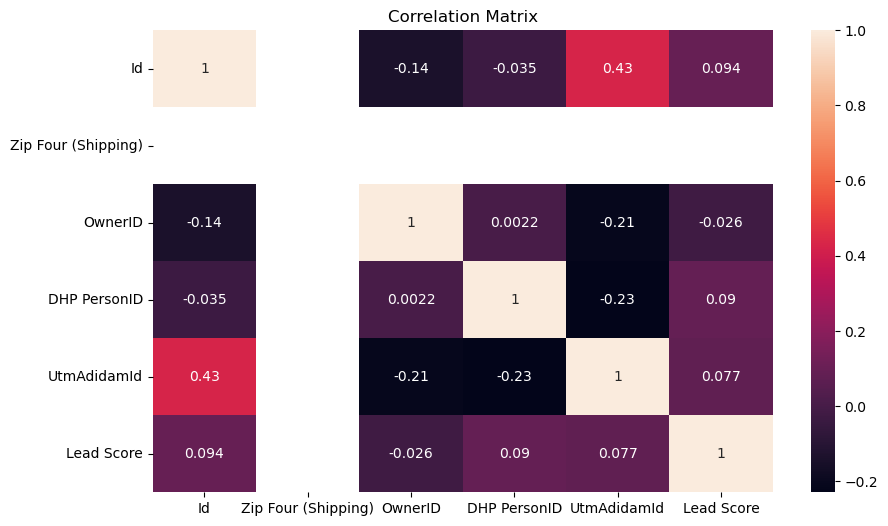

In [57]:
#visualize the correlation matrix to see if there is any correlatiob between the nuemeric columns
plt.figure(figsize=(10, 6))
# sns.color_palette("rocket", as_cmap=True)
sns.heatmap(all_optout_concise_df.corr(numeric_only=True), annot=True)
plt.title('Correlation Matrix')
plt.show()  
#as expected there is no correlation between the numeric colums as they are IDs and Lead Score is not related to any other numeric field.

In [65]:
#dropping more features that have very little useful data
df = all_optout_concise_df.drop (columns=['Tag Categories',
 'Tag Category Ids',
 'GaContent',
 'UtmSource',
 'Postal Code.1',
 'DHP Survey: Age Group', 
 'Tag Ids',
 'Language',
 'UtmReferurl',
 'UtmMedium',
 'City (Optional)',
 'Last Name',
 'Street Address 1',
 'UtmIPAddress',
 'Comments/Notes',
 'Postal Code (Optional)',
 'Postal Code',
 'First Name',
 'Country (Optional)',
 'GaTerm',
 'State (Shipping)',
 'Postal Code (Optional).1',
 'Owner',
 'Person Type',
 'Name',
 'Street Address 2',
 'Date of Last Screening Attendance',
 'Time Zone',
 'Created By',
 'Preferred Language'
 ])

In [67]:
#Look at categorical columns after dropping more columns above
cols2 = df.columns
num_cols2 = df._get_numeric_data().columns
catg_cols2 = list(set(cols2) - set(num_cols2))
catg_cols2

['Lead Source Category',
 'State',
 'State (Optional)',
 'Tags',
 'UtmCampaign',
 'D_D Why Interested',
 'GaSource',
 'Level of Association',
 'GaCampaign',
 'Event',
 'Dawn Horse Press Updates',
 'Email Status',
 'Country',
 'Monthly Conversations',
 'GaMedium',
 'Global Follow Up Events',
 'City',
 'Lead Source',
 'Date Created',
 'Screening',
 'Topical Interests',
 'Email',
 'Last Updated',
 'Notes',
 'India Satsang',
 'GaReferurl',
 'Opted Out',
 'Conscious Light Updates Opt In',
 'Date of Last Screening Registration',
 'IPAddress',
 'Global Newsletter Opt-In Status',
 'Country (Shipping)']

In [71]:
#Review values and summarize the categorical column values below (based on the value counts in the cell below)
catg_cols2 = [
 'Email Status',  # good values. only 13 diff values. more than 25 rows have them. what is "Unengaged Marketable"? D q
 'D_D Why Interested',  #Null out Select. Rest are good.  Select...                    24757
 'GaCampaign',
 'Screening',  # update to null where it is "Select...     15574"; UPDATE REST TO Spanish, English (India), English (NZ/OZ) etc.
 'Topical Interests',  # DROP IT. Select...                26357
 'Lead Source',  #349 values. Keep the top 20? Maybe combine a few values to reduce columns after OneHotEncoding? Matilde q.
 'State',  # has England etc. in it. But also has legitimate states. 844 different values
 'Country (Shipping)',  #How is this different from the Country column? D q. -- see analysis below
 'GaSource',  # update Source to source, Google to google etc. REDUCE # OF VALUES IN THIS COLUMN. d q. Are all FB vals different?
 'GaReferurl',  # seems to make no sense. DROP IT. or Ask D on the significance of the values.
 'Lead Source Category',  # good values. 7 different values. 
 'Opted Out',
 'UtmCampaign',  # good values
 'State (Optional)',
 'Tags', # D q. What is the point of the tags? DROP THEM? 7101 unique values.
 'India Satsang',  # update to Y where there are values, and N where there are none! Null out "Select...  26347"
 'Level of Association',  # DROP. only 1 row with the value of Public
 'Notes',  #324 values. some of it is nullnull etc. Rest won't be good for classifying anyway. D q. DROP it?
 'Dawn Horse Press Updates',  # keep. No=185, Yes=48
 'GaMedium',
 'Conscious Light Updates Opt In', # good field. No 189, Yes 29
 'Monthly Conversations',  # update to null where it is "Select...  26276". rest could be made into one field called "Webinar". D q -- where webinars different?.
 'Country', #175 values. Consolidate the small ones into “Rest” or “Other”
 'Global Follow Up Events',  # 130 values: so update to Y where there are values, and N where there are none! Null out "Select... 25858"
 'City', # Maybe I could make this into a yes/no field? Ask Matilde! Or keep the top 10 and make the rest as just "city"
 'Global Newsletter Opt-In Status',  # good values
 'Event']  # update to Online Screening: C L film, Webinar, etc. -- not so many values as it is now?

In [73]:
for col in df.columns:
    if col in (catg_cols2):
                print(f'{col} unique values: {df[col].value_counts()}')

City unique values: City
London                   237
Buenos Aires             153
Amsterdam                148
México                   145
Bogotá                   137
                        ... 
Malaunay                   1
Dettingen - Teck           1
Kranenburg                 1
Saint-Martin-sur-Ocre      1
Ancaster                   1
Name: count, Length: 5574, dtype: int64
State unique values: State
California                 575
CA                         422
Ontario                    341
New South Wales            254
British Columbia           227
                          ... 
Stockholm län                1
Västra götaland              1
Val d oise                   1
Hägersten                    1
Northern Bahr el Ghazal      1
Name: count, Length: 2349, dtype: int64
Country unique values: Country
United States        4565
United Kingdom       2365
Netherlands (the)    2042
Canada               1707
Australia            1458
                     ... 
Lawrence, KS         

In [81]:
#shape of the final data set that is going to be used for analysis
df.shape

(26364, 38)

In [89]:
#Choose the actual columns that we want to do the analysis with, and put it into a df called df_final
df_final = all_optout_concise_df [[
 #num cols
    'Id', # 'Zip Four (Shipping)',
    'OwnerID', #'DHP PersonID', 'UtmAdidamId',
    'Lead Score',
  #catg clos next
 #  'GaCampaign',
 # 'GaSource',
 'Email Status',
 # 'Country (Shipping)',   #NEEDS WORK. have Qs. D q
 # 'Country',   #NEEDS WORK
 'India Satsang',
 # 'Level of Association',
 # 'GaMedium',
 'Global Newsletter Opt-In Status',
 'Opted Out',
 'Conscious Light Updates Opt In',
 # 'City', #NEEDS WORK
 # 'Date of Last Screening Registration',
 # 'Topical Interests',
 # 'Screening',  #NEEDS WORK
 # 'Email',
 'Dawn Horse Press Updates',
 'D_D Why Interested',  #REMOVE SELECT
 # 'Monthly Conversations',  #NEEDS WORK
 'Lead Source Category',
 'UtmCampaign',
 # 'IPAddress',
 # 'Last Updated',
 # 'GaReferurl',
 # 'State (Optional)',
 # 'Tags',
 # 'State',
 'Lead Source'  #check all values for <
 # 'Global Follow Up Events', #NEEDS WORK
 # 'Notes',
 # 'Date Created',
 # 'Event' #NEEDS WORK
]]
df_final.head(2)

,Id,OwnerID,Lead Score,Email Status,India Satsang,Global Newsletter Opt-In Status,Opted Out,Conscious Light Updates Opt In,Dawn Horse Press Updates,D_D Why Interested,Lead Source Category,UtmCampaign,Lead Source
0,11,2013,11,Confirmed,Select...,NaN,0,NaN,NaN,Select...,Email Upload,NaN,D&D Webinar 2014
1,77,2013,6,Confirmed,Select...,Yes,0,NaN,NaN,Select...,Email Upload,NaN,D&D Webinar 2014


In [91]:
#fill all the NaN values with 'NoneSelected'
df_final = df_final.fillna('NoneSelected')
df_final.head(2)

,Id,OwnerID,Lead Score,Email Status,India Satsang,Global Newsletter Opt-In Status,Opted Out,Conscious Light Updates Opt In,Dawn Horse Press Updates,D_D Why Interested,Lead Source Category,UtmCampaign,Lead Source
0,11,2013,11,Confirmed,Select...,NoneSelected,0,NoneSelected,NoneSelected,Select...,Email Upload,NoneSelected,D&D Webinar 2014
1,77,2013,6,Confirmed,Select...,Yes,0,NoneSelected,NoneSelected,Select...,Email Upload,NoneSelected,D&D Webinar 2014


In [93]:
#separate the data into X (features) and y (target)
X = df_final.drop('Opted Out', axis = 1)
y = df_final['Opted Out'].fillna('0')

In [469]:
X.head(2)

,Id,OwnerID,Lead Score,Email Status,India Satsang,Global Newsletter Opt-In Status,Conscious Light Updates Opt In,Dawn Horse Press Updates,D_D Why Interested,Lead Source Category,UtmCampaign,Lead Source
0,11,2013,11,Confirmed,Select...,NoneSelected,NoneSelected,NoneSelected,Select...,Email Upload,NoneSelected,D&D Webinar 2014
1,77,2013,6,Confirmed,Select...,Yes,NoneSelected,NoneSelected,Select...,Email Upload,NoneSelected,D&D Webinar 2014


In [95]:
#review the categorical columns in the df_final
cols_final = X.columns
num_cols_final = X._get_numeric_data().columns
catg_cols_final = list(set(cols_final) - set(num_cols_final))
catg_cols_final

['India Satsang',
 'Lead Source Category',
 'Conscious Light Updates Opt In',
 'Dawn Horse Press Updates',
 'Email Status',
 'Lead Source',
 'UtmCampaign',
 'D_D Why Interested',
 'Global Newsletter Opt-In Status']

In [97]:
num_cols_final

Index(['Id', 'OwnerID', 'Lead Score'], dtype='object')

In [99]:
#print out and review the counts of the values in the categorical columns
for col in X.columns:
    if col in (catg_cols_final):
                print(f'{col} unique values: {X[col].value_counts()}')

Email Status unique values: Email Status
Unengaged Marketable    15960
Unconfirmed              7560
List Unsubscribe          768
Confirmed                 645
Opt-Out: Admin            449
Opt-Out                   389
Hard Bounce               269
Provided Feedback         179
Unknown                    91
Opt-Out: System            35
Non-marketable             16
Reported Spam               2
Confirmed (Legacy)          1
Name: count, dtype: int64
India Satsang unique values: India Satsang
Select...        26347
Tue. May 4           5
Tue Nov. 10          2
Tue. March 16        2
Tue. March 23        2
Tue. Dec. 1          1
Tue. Nov. 24         1
Tue. Dec. 8          1
Tue. Jan. 5          1
Tue. Nov. 17         1
Tue. Jan. 19         1
Name: count, dtype: int64
Global Newsletter Opt-In Status unique values: Global Newsletter Opt-In Status
NoneSelected    25780
Yes               376
No                208
Name: count, dtype: int64
Conscious Light Updates Opt In unique values: Cons

##A Baseline Model##
Before we build our first model, we want to establish a baseline. What is the baseline performance that our classifier should aim to beat?

In [101]:
(df_final['Opted Out']=='1').sum() #1642
(df_final['Opted Out']=='0').sum() #24722
Baseline = (df_final['Opted Out']=='0').sum() / ((df_final['Opted Out']=='1').sum() + (df_final['Opted Out']=='0').sum())
Baseline # 
# If you guessed No(=0) in all cases, you would be correct 93.7% of the time! Matilde q

0.9377181004399939

In [103]:
BaselineForYes = (df_final['Opted Out']=='1').sum() / ((df_final['Opted Out']=='1').sum() + (df_final['Opted Out']=='0').sum())
BaselineForYes # 0.06228189956000607  => people opted out 6.2% of the time, as per the data

0.06228189956000607

In [105]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)
dummy_clf.score(X, y)  #0.9377181004399939  #SAME AS ABOVE

0.9377181004399939

In [107]:
#One hot encode all the categorical columns
preprocessor = ''

preprocessor = make_column_transformer((OneHotEncoder(drop = 'if_binary', sparse_output=False), catg_cols_final), 
                                     remainder = 'passthrough')

pipeline = make_pipeline(
    preprocessor,
    LogisticRegression(random_state=42)
)

In [109]:
#review the transformed X features
X_transformed = preprocessor.fit_transform(X)
X_transformed

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.1000e+01, 2.0130e+03,
        1.1000e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 7.7000e+01, 2.0130e+03,
        6.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 9.5000e+01, 0.0000e+00,
        1.0000e+00],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 7.7992e+04, 0.0000e+00,
        2.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 7.7994e+04, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 7.7996e+04, 0.0000e+00,
        2.0000e+00]])

In [111]:
#store the transformed X in X_new
X_new = pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out())
X_new #26364 rows × 406 columns

,onehotencoder__India Satsang_Select...,onehotencoder__India Satsang_Tue Nov. 10,onehotencoder__India Satsang_Tue. Dec. 1,onehotencoder__India Satsang_Tue. Dec. 8,onehotencoder__India Satsang_Tue. Jan. 19,onehotencoder__India Satsang_Tue. Jan. 5,onehotencoder__India Satsang_Tue. March 16,onehotencoder__India Satsang_Tue. March 23,onehotencoder__India Satsang_Tue. May 4,onehotencoder__India Satsang_Tue. Nov. 17,onehotencoder__India Satsang_Tue. Nov. 24,onehotencoder__Lead Source Category_Direct,onehotencoder__Lead Source Category_Email Upload,onehotencoder__Lead Source Category_EventBrite,onehotencoder__Lead Source Category_NoneSelected,onehotencoder__Lead Source Category_Organic,onehotencoder__Lead Source Category_Paid,onehotencoder__Lead Source Category_Referral,onehotencoder__Lead Source Category_Social,onehotencoder__Conscious Light Updates Opt In_No,onehotencoder__Conscious Light Updates Opt In_NoneSelected,onehotencoder__Conscious Light Updates Opt In_Yes,onehotencoder__Dawn Horse Press Updates_No,onehotencoder__Dawn Horse Press Updates_NoneSelected,onehotencoder__Dawn Horse Press Updates_Yes,onehotencoder__Email Status_Confirmed,onehotencoder__Email Status_Confirmed (Legacy),onehotencoder__Email Status_Hard Bounce,onehotencoder__Email Status_List Unsubscribe,onehotencoder__Email Status_Non-marketable,onehotencoder__Email Status_Opt-Out,onehotencoder__Email Status_Opt-Out: Admin,onehotencoder__Email Status_Opt-Out: System,onehotencoder__Email Status_Provided Feedback,onehotencoder__Email Status_Reported Spam,onehotencoder__Email Status_Unconfirmed,onehotencoder__Email Status_Unengaged Marketable,onehotencoder__Email Status_Unknown,onehotencoder__Lead Source_3rd Party,onehotencoder__Lead Source_3rd party-bohemian-calendar_newsletter_screenings_reg,onehotencoder__Lead Source_3rd party-spirit of change-english_vimeo_boston_newsletter_banner_reg,onehotencoder__Lead Source_5e31a5hn.pages.infusionsoft.net,onehotencoder__Lead Source_AOL,onehotencoder__Lead Source_Advocacy List Import,onehotencoder__Lead Source_Bing,onehotencoder__Lead Source_Chicago Import,"onehotencoder__Lead Source_Conscious Light: Documentary Film on Adi Da Samraj - Newton, MA",onehotencoder__Lead Source_D&D Webinar 2014,onehotencoder__Lead Source_D&D Webinar 2015,onehotencoder__Lead Source_DHP Public List,onehotencoder__Lead Source_Death & Dying Checklist,onehotencoder__Lead Source_Ecosia,"onehotencoder__Lead Source_EventBrite, 104698628416","onehotencoder__Lead Source_EventBrite, 104844996206","onehotencoder__Lead Source_EventBrite, 107728205964","onehotencoder__Lead Source_EventBrite, 48768347440","onehotencoder__Lead Source_EventBrite, 48768642322","onehotencoder__Lead Source_EventBrite, 48768685451","onehotencoder__Lead Source_EventBrite, 48768810826","onehotencoder__Lead Source_EventBrite, 48891542921","onehotencoder__Lead Source_EventBrite, 49355940948","onehotencoder__Lead Source_EventBrite, 49365347082","onehotencoder__Lead Source_EventBrite, 49409262434","onehotencoder__Lead Source_EventBrite, 49500199429","onehotencoder__Lead Source_EventBrite, 49581186664","onehotencoder__Lead Source_EventBrite, 49871860076","onehotencoder__Lead Source_EventBrite, 51272235637","onehotencoder__Lead Source_EventBrite, 51733324767","onehotencoder__Lead Source_EventBrite, 52510349870","onehotencoder__Lead Source_EventBrite, 53570636215","onehotencoder__Lead Source_EventBrite, 53936886680","onehotencoder__Lead Source_EventBrite, 54372180656","onehotencoder__Lead Source_EventBrite, 56533957589","onehotencoder__Lead Source_EventBrite, 57729521553","onehotencoder__Lead Source_EventBrite, 57732995945",...,onehotencoder__Lead Source_social-facebook-screening_spain_july4_reg,onehotencoder__Lead Source_social-facebook-screening_spain_june6_reg,onehotencoder__Lead Source_social-facebook-screening_spain_may2_reg,onehotencoder__Lead Source_social-facebook-screening_spain_oct9_2021_reg,onehotencoder__Lead Source_social-facebook-screening_spain_sept19_2021_reg,onehotencoder__Lead 

In [113]:
#Plit X and Y into train and test sets. Use Stratify to ensure that the y data is evenly distributed between Test and train
X_train, X_test, y_train, y_test = train_test_split(X_new, y, stratify=y)

In [115]:
#check y_train value counts (after stratify above)
y_train.value_counts(normalize=True)

Opted Out
0    0.937693
1    0.062307
Name: proportion, dtype: float64

In [117]:
#check y_test value counts (after stratify above)
y_test.value_counts(normalize=True)

Opted Out
0    0.937794
1    0.062206
Name: proportion, dtype: float64

In [ ]:
#Try various modeling approaches to pick the best model

##1. LogisticRegression##

In [119]:
%%time
lgr = LogisticRegression(max_iter=100000).fit(X_train, y_train) 
lgr_train_Acc= lgr.score(X_train, y_train)  
lgr_test_Acc=lgr.score(X_test, y_test)  
lgr_train_Acc, lgr_test_Acc 

CPU times: total: 1.16 s
Wall time: 1.66 s


(1.0, 0.9998482779547868)

##2. KNeighborsClassifier

In [122]:
%%time 
knn = KNeighborsClassifier().fit(X_train, y_train)  
knn_train_Acc= knn.score(X_train, y_train)   
knn_test_Acc=knn.score(X_test, y_test)   
knn_train_Acc, knn_test_Acc 

CPU times: total: 15.7 s
Wall time: 2.35 s


(0.9387548677489506, 0.9356698528296161)

##3. DecisionTreeClassifier##

In [125]:
#%time
dtc = DecisionTreeClassifier().fit(X_train, y_train)  
dtc_train_Acc= dtc.score(X_train, y_train)   
dtc_test_Acc=dtc.score(X_test, y_test)  
dtc_train_Acc, dtc_test_Acc  

(1.0, 0.9998482779547868)

In [127]:
#Decision tree might be overfit as the Training and testing accuracy = 1.0
dtc.get_depth()  #5

5

In [129]:
##4. SVC##

In [131]:
%%time
svc = SVC().fit(X_train, y_train)  
svc_train_Acc= svc.score(X_train, y_train)  
svc_test_Acc=svc.score(X_test, y_test)  
svc_train_Acc, svc_test_Acc   

CPU times: total: 7.56 s
Wall time: 17.2 s


(0.9376928134324584, 0.9377939614626005)

In [135]:
#print the model coefficients from the LogisticRegerssion model, WHICH IS THE BEST GIVEN THE CURRENT DATA SET!
model = lgr
t=pd.DataFrame()
t['coeff'] = pd.DataFrame(model.coef_.reshape(-1))
t['feature_names'] = model.feature_names_in_
t.set_index('feature_names', inplace=True)
t

,coeff
feature_names,
onehotencoder__India Satsang_Select...,-0.227467
onehotencoder__India Satsang_Tue Nov. 10,-0.000184
onehotencoder__India Satsang_Tue. Dec. 1,-0.000392
onehotencoder__India Satsang_Tue. Dec. 8,-0.000207
onehotencoder__India Satsang_Tue. Jan. 19,0.000000
...,...
onehotencoder__Global Newsletter Opt-In Status_NoneSelected,-0.181314
onehotencoder__Global Newsletter Opt-In Status_Yes,0.036745
remainder__Id,0.000011


In [137]:
#sort the coeffs according the absolute values and plot
t = t.reindex(t['coeff'].abs().sort_values(ascending=False).index)

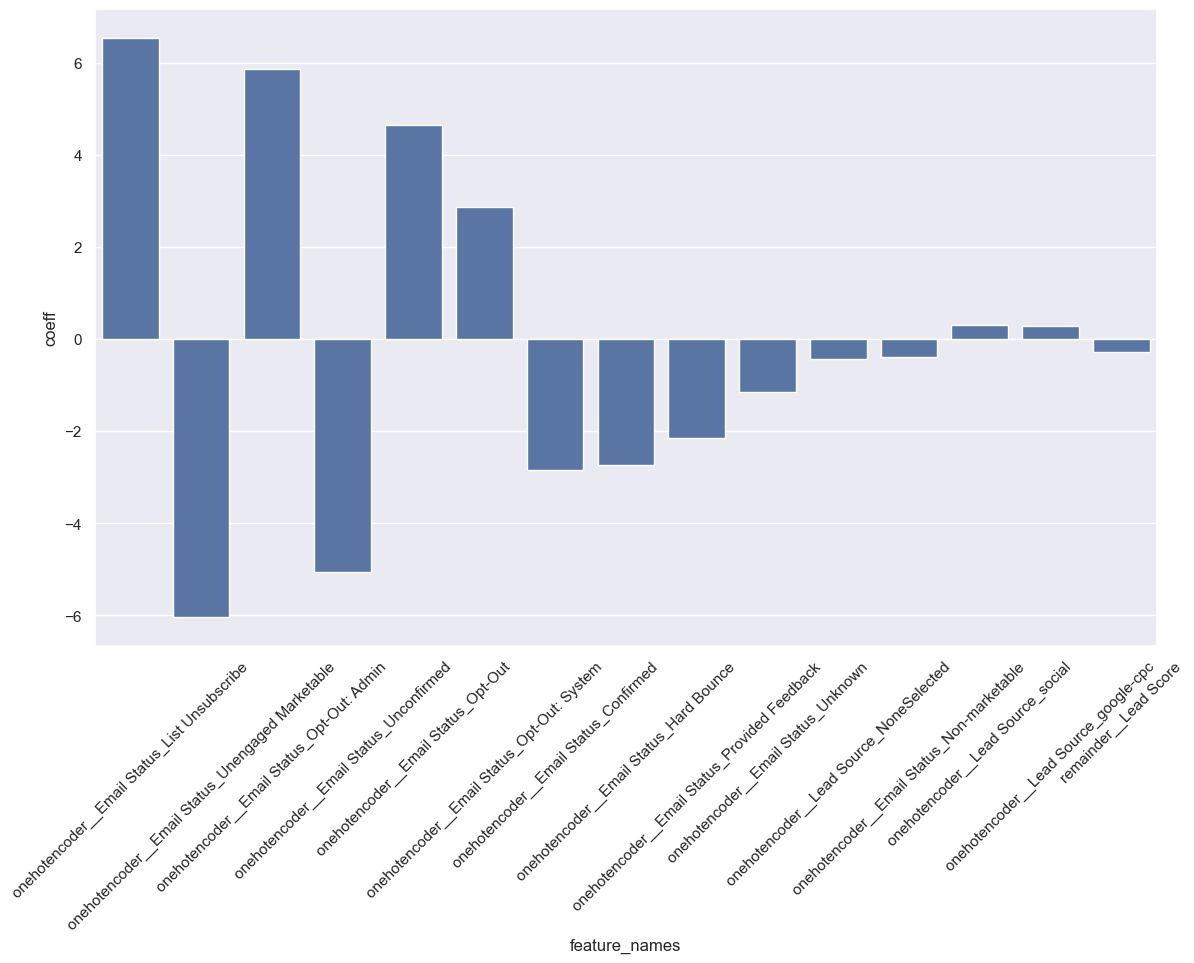

In [141]:
#Plot the sorted list of co-efficients
sns.set(rc={'figure.figsize':(13.7,8.27)})
sns.barplot(t[0:15], y='coeff', x='feature_names', orient='v')
plt.xticks(rotation=45)
plt.show()

##Improving the Model Further##

In [ ]:
%%time 
# lgr -- Initialize the model
lgr_grid = LogisticRegression(max_iter=10000)

# hyperparameters to tune
params = {
    'C': [0.001, 0.01, 1, 10, 100],
    'penalty': ['l1', 'l2'],   #l1 penalty works only for liblinear and saga and not for the other solvers.
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  #'newton-cg', and 'liblinear' are slower algorithms.
}

# Use GridSearchCV to find the best hyperparameters using cross-validation
grid_search_lgr = GridSearchCV(lgr_grid, params, cv=5, scoring='accuracy')
grid_search_lgr.fit(X_train, y_train)

# Display best hyperparameters and cross-validation score
print("Best hyperparameters:", grid_search_lgr.best_params_)
print("Best cross-validation accuracy:", grid_search_lgr.best_score_)

# Use the best model for subsequent steps
model = grid_search_lgr.best_estimator_

# Same results for both 10% data and all data
# Best hyperparameters: {'C': ?, 'penalty': '?', 'solver': '??'}
# Best cross-validation accuracy: 0.?   (0.? -- for all data)
# CPU times: total: ?
# Wall time: ?